## 1. Introduction

In [159]:
# Importing libraries
import igraph
import pandas as pd
import numpy as np
from igraph.drawing import plot
import matplotlib.pyplot as plt

In [85]:
# Importing edges data into Pandas Dataframe
df_edges = pd.read_csv('network/edges.csv', header = 0, names = ['source','target','distance','airline','airline_code','codeshare','equiment','stops'])

In [86]:
# Importing nodes data into Pandas Dataframe
df_nodes = pd.read_csv('network/nodes.csv', header = 0, names = ['index','id','name','city','country','IATA/FAA','ICAO','latitude','longitude','altitude','timezone','DST','_pos'])

In [87]:
df_edges

,source,target,distance,airline,airline_code,codeshare,equiment,stops
0,0,2,124.520121,CG,1308,0,DH8 DHT,0
1,0,3,157.150822,CG,1308,0,DH8,0
2,0,1,106.747399,CG,1308,0,DH8,0
3,0,4,424.726096,CG,1308,0,DH8,0
4,0,4,424.726096,PX,328,0,DH4 DH8 DH3,0
...,...,...,...,...,...,...,...,...
66766,3211,2767,1217.384762,KN,10741,0,737,0
66767,3211,2840,375.021414,MU,1758,1,737,0
66768,3211,2767,1217.384762,MU,1758,1,737,0
66769,3212,1675,425.533589,GS,690,0,E90,0


In [88]:
df_nodes

,index,id,name,city,country,IATA/FAA,ICAO,latitude,longitude,altitude,timezone,DST,_pos
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,"array([6.29268027, 1.37900375])"
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,"array([6.30735453, 1.39906658])"
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,"array([6.3014785 , 1.38535133])"
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,"array([6.27849235, 1.39511825])"
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,"array([6.23308524, 1.34013967])"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,3209,11290,Kongolo Airport,Kongolo,Congo (Kinshasa),KOO,FZRQ,-5.394440,26.990000,1850,1.0,U,"array([5.5164688 , 1.37876336])"
3210,3210,11436,Tarko-Sale Airport,Tarko-Sale,Russia,TQL,USDS,64.930801,77.818100,82,5.0,U,"array([5.87627232, 1.43157964])"
3211,3211,11473,Jinchuan Airport,Jinchuan,China,JIC,ZLJC,38.542222,102.348333,4740,8.0,U,"array([6.169881 , 1.28830756])"
3212,3212,11498,Alashankou Bole (Bortala) airport,Bole,China,BPL,ZWAX,44.895000,82.300000,1253,8.0,N,"array([6.07268073, 1.40575676])"


In [93]:
# Creating the Airport Network from nodes Dataframe data
AN = igraph.Graph.TupleList(df_edges.itertuples(index=False), 
                            edge_attrs=['distance','airline','airline_code','codeshare','equiment','stops'])

IGRAPH UN-- 3214 66771 -- 
+ attr: name (v), airline (e), airline_code (e), codeshare (e), distance (e), equiment (e), stops (e)


In [95]:
df[['source','target','distance']].where((df['source'] == 0) & (df['target'] == 4)).dropna()

,source,target,distance
3,0.0,4.0,424.726096
4,0.0,4.0,424.726096


## 2. Network representation

In [105]:
# Apply a layout algorithm
layout = AN.layout_kamada_kawai()

# Customize node and edge attributes, e.g., colors, sizes
visual_style = {
    "vertex_size": 10,
    "vertex_color": "lightblue",
    "edge_color": "gray",
    "edge_width": 0.2,
    "bbox": (800, 800),
    "layout": layout,
    "margin": 20
}

# Plot the graph
#plot(AN, **visual_style)

## 3. Network classification

In [104]:
# Check if the Graph is directed or undirected
if AN.is_directed():
    print('The Airport Network is directed.')
else:
    print('The Airport Network is undirected.')

The Airport Network is undirected.


In [47]:
AN.is_weighted()

False

## 4. Network topological properties

### 4.1 Summary

In [110]:
# Print the number of nodes and edges
print(AN.summary())

IGRAPH UN-- 3214 66771 -- 
+ attr: name (v), airline (e), airline_code (e), codeshare (e), distance (e), equiment (e), stops (e)


### 4.1 Network diameter
The network diameter is defined as the shortest distance between the two most distant nodes in the network.

In [108]:
diameter = AN.diameter()

print('The Airport Network diameter is: {diameter}')

The Airport Network diameter is: 12


### 4.2 Average path length
Average path length of a network is defined as the mean distance between all pairs of nodes.

In [120]:
avg_path_len = AN.average_path_length()

print(f'The Airport Network average path length is: {avg_path_len}')

The Airport Network average path length is: 3.9585003807963672


## 5 Identifying clusters

In [121]:
# Finding the connected components/clusters
clusters = AN.connected_components()

print(f'Number of clusters/connected components found: {len(clusters)}')

Number of clusters/connected components found: 7


In [126]:
# Calculating each cluster size
i = 1

for c in clusters:
    print(f'Cluster {i} size is: {len(c)}')
    i = i + 1

Cluster 1 size is: 3188
Cluster 2 size is: 10
Cluster 3 size is: 4
Cluster 4 size is: 4
Cluster 5 size is: 2
Cluster 6 size is: 2
Cluster 7 size is: 4


In [129]:
# Finding the biggest cluster
cluster_sizes = [len(c) for c in clusters]

print(f'The biggest cluster size is: {max(cluster_sizes)}')

The biggest cluster size is: 3188


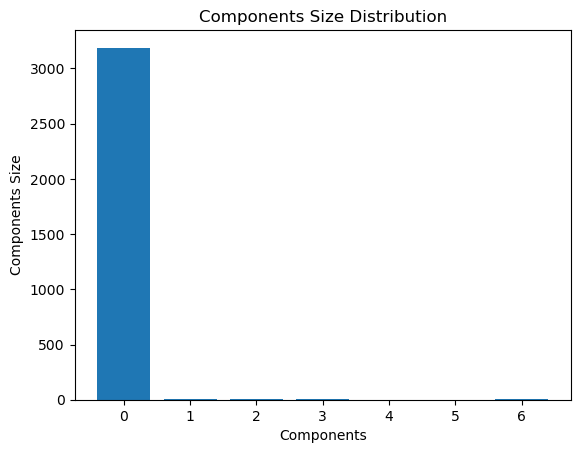

In [138]:
# Plotting the component size distribution
plt.bar(range(len(cluster_sizes)), cluster_sizes)
plt.xlabel('Components')
plt.ylabel('Components Size')
plt.title('Components Size Distribution')
plt.show()

## 6. Degree Distribution

### 6.1 Maximum node degrees

In [153]:
AN_degree = AN.degree()

max_degree = max(AN_degree)

print(f'The maximum node degree is: {max_degree}')

The maximum node degree is: 1826


### 6.2 Average node degrees

In [157]:
avg_degree = sum(AN_degree) / len(AN_degree)

print(f'The average node degree is: {avg_degree}')

The average node degree is: 41.550093341630365


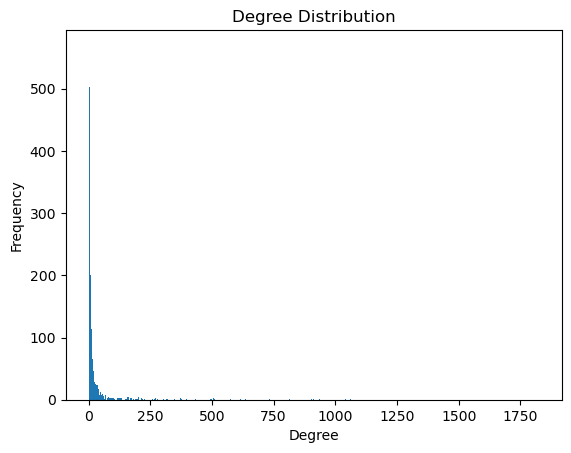

In [160]:
# Create a histogram of the degree distribution
hist, bin_edges = np.histogram(AN_degree, bins=range(max(AN_degree) + 2))

# Plot the degree distribution
plt.bar(bin_edges[:-1], hist, width=1, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [94]:
# Shortest path
print('the distance from vertex 1 to vertex 4 in AN:')
print(AN.distances(source=0, target=4, weights='distance'))

the distance from vertex 1 to vertex 4 in AN:
[[424.7260963139924]]


In [49]:
AN.density()

0.01293186845366647

In [50]:
deg = AN.degree()
for d in deg:
    if d > 1000:
        print(d)

1041
1047
1108
1826
1061


In [28]:
AN.betweenness()

[0.0,
 7.4080808080808085,
 6.031818181818183,
 3.2,
 69891.82160800176,
 0.4,
 0.95,
 0.0,
 0.0,
 0.0,
 0.0,
 0.18181818181818182,
 0.0,
 0.35789473684210527,
 53.67054098542613,
 178111.3187335717,
 2726.2394551905572,
 0.2909090909090909,
 458.7605448094245,
 8907.9677241089,
 0.0,
 39065.936605446026,
 29643.162637474295,
 47724.37284030321,
 139184.00665953202,
 0.0,
 0.0,
 101656.66940904614,
 41762.43734043872,
 161988.54205768346,
 219888.8316031583,
 191355.59055498076,
 0.0,
 12764.327768071735,
 24226.13918532765,
 0.0,
 6370.0,
 0.0,
 36280.802495629236,
 15920.408501025653,
 4.408501025679602,
 0.0,
 29595.95951565972,
 9554.999999999998,
 74824.64343560782,
 2.0000000000000004,
 0.0,
 3186.0,
 0.0,
 0.0,
 0.0,
 59660.613969073405,
 9038.49021026501,
 85392.76366605326,
 234717.557558825,
 99656.63241221257,
 2190.9783527699256,
 52697.33710721055,
 53486.594327424194,
 374786.38319621206,
 129088.30696582599,
 57706.85528115448,
 265953.2673214298,
 29757.450423897782,
 5

In [51]:
AN.closeness()

[0.228803216311293,
 0.22888537776501006,
 0.22888537776501006,
 0.22885250610369093,
 0.2965754699423041,
 0.228803216311293,
 0.22881964388282597,
 0.22878679109834887,
 0.22878679109834887,
 0.22878679109834887,
 0.22878679109834887,
 0.22878679109834887,
 0.22878679109834887,
 0.228803216311293,
 0.2303411390575311,
 0.3355443251210781,
 0.228803216311293,
 0.228803216311293,
 0.228803216311293,
 0.29321924740086486,
 0.2287539477461958,
 0.2936785845927018,
 0.3070031788845005,
 0.2537218374333254,
 0.38149389514005266,
 0.22878679109834887,
 0.2287539477461958,
 0.3405642231245993,
 0.3094775684598951,
 0.38588206804697905,
 0.36244740134197656,
 0.34945175438596493,
 0.2287539477461958,
 0.21543973500980193,
 0.2493740219092332,
 0.19967420587682477,
 0.17731167241571158,
 0.1772919448153093,
 0.27040556592567455,
 0.2154688662024204,
 0.21532328896696168,
 0.21530874206188352,
 0.33080755657047956,
 0.19968671679197994,
 0.36886574074074074,
 0.21296358169061141,
 0.13092059318